# OpenCV

Submitted by: Ephi Frankel


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib import colors
#interact addition
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

print("OpenCV Version : %s " % cv2.__version__)



OpenCV Version : 3.4.1 


 https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html

### 1. Image processing

Load the 'coins' image. Experiment with the tools discussed in class (histograms, thresholding, morphological operators, etc.) to label each coin with a unique label. Mark each coin with a unique color.

Show all intermediate steps along the way.

Count the number of pixels of each coin (its area) and mark the center of each coin.


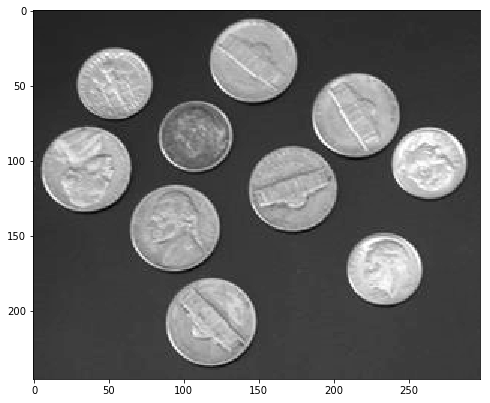

In [2]:
coins = cv2.imread('coins.jpg',0)

plt.figure(figsize=(8,8))
plt.imshow(coins, cmap='gray')
plt.show()

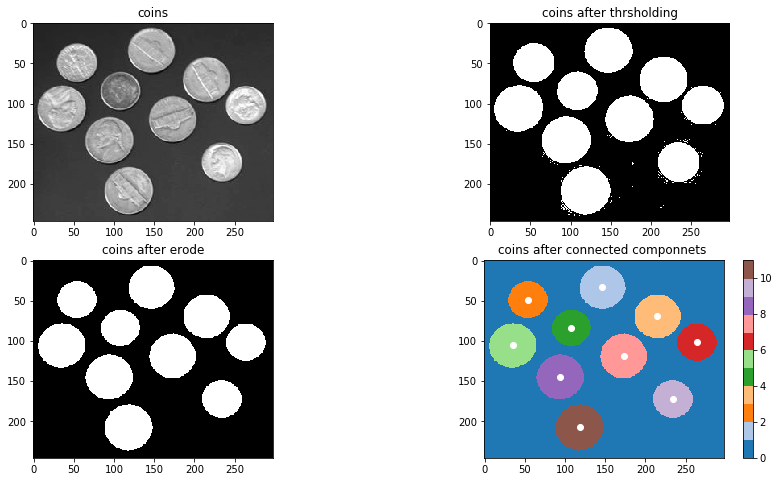

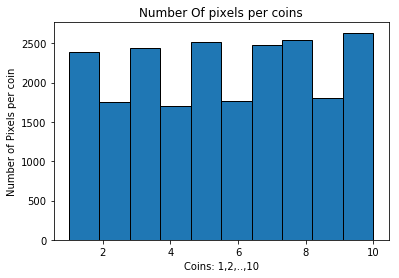

In [3]:
# your code here...
#using thrsholding in order to retrive binary image
ret,coins_th = cv2.threshold(coins,78,255,cv2.THRESH_BINARY)

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('coins')
plt.imshow(coins,cmap='gray')
plt.subplot(2,2,2)
plt.title('coins after thrsholding')
plt.imshow(coins_th,cmap='gray')
#clean anomalties
kernel = np.ones((3,3),np.uint8)
coins_th = cv2.erode(coins_th,kernel,iterations = 1)
plt.subplot(2,2,3)
plt.title('coins after erode')
plt.imshow(coins_th,cmap='gray')
plt.subplot(2,2,4)
plt.title('coins after connected componnets ')
# using connected componnets in order to identify coins
retval, labels = cv2.connectedComponents(coins_th)
bounds=[0,1,2,3,4,5,6,7,8,9,10,11]
norm = colors.BoundaryNorm(bounds, 11)
for i in range(1,11):
    msk = labels == i
    result = np.zeros_like(labels)
    result[msk] =labels[msk]
    cords = np.nonzero(result)
    avg = np.mean(cords,axis=1)
    plt.scatter(avg[1],avg[0],color='white')
plt.imshow(labels,cmap=plt.cm.tab20,norm=norm)
plt.colorbar()
plt.show()
#calculating number of pixels per coin
msk = labels > 0
labelFlat = labels[msk].flatten()
plt.title('Number Of pixels per coins')
plt.xlabel('Coins: 1,2,..,{}'.format(labelFlat.max()))
plt.ylabel('Number of Pixels per coin')
plt.hist(labelFlat,ec='black')
plt.show()


### 2. Canny Edges

Load the 'x-ray' image. Apply Canny edge detection (tune the paramers until you are satisfied with the results).

If you wish, you can try to add interactive sliders to play with the parameters:
http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html


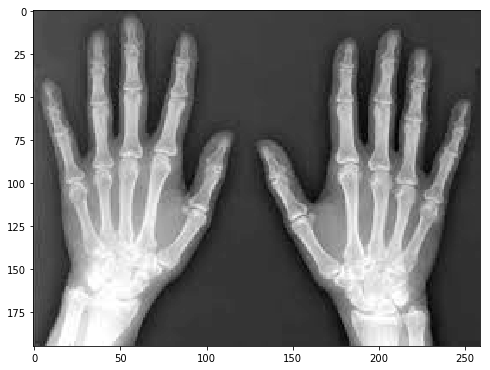

In [4]:
xray = cv2.imread('xray.jpeg',0)

plt.figure(figsize=(8,8))
plt.imshow(xray, cmap='gray')
plt.show()



In [5]:
# your code here...
def f(th_start , th_end):
    edges = cv2.Canny(xray,th_start,th_end)
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.imshow(xray,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(edges,cmap='gray')
    plt.show()

interactive_plot = interactive(f, th_start=100, th_end=200)
interactive_plot

### 3. Feature matching

Load the 'clutteredDesk' image and the two smaller query images (taken from a different view points). Calculate SIFT keypoints in all images, and try to find good matches. Mark the matches on the big image, with different color for each query image. 


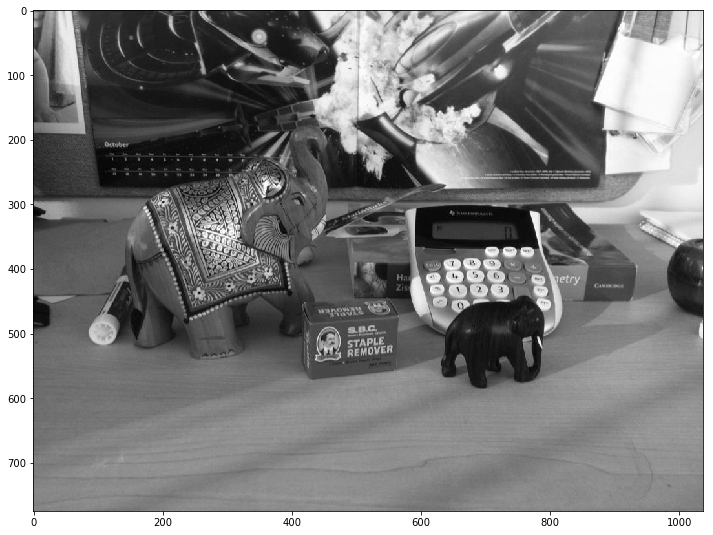

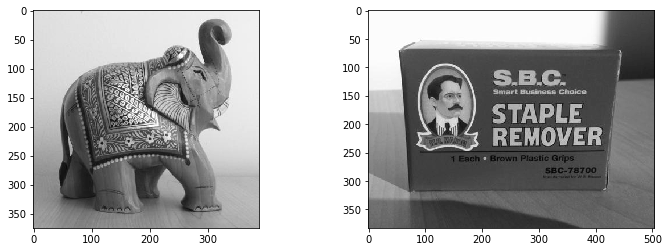

In [6]:
img = cv2.imread('clutteredDesk.jpg',0)
q1 = cv2.imread('elephant.jpg',0)
q2 = cv2.imread('stapleRemover.jpg',0)


plt.figure(figsize=(12,12))
plt.imshow(img, cmap='gray')
plt.show()


plt.figure(figsize=(12,4))
plt.subplot(1,2,1),plt.imshow(q1, cmap='gray')
plt.subplot(1,2,2),plt.imshow(q2, cmap='gray')
plt.show()



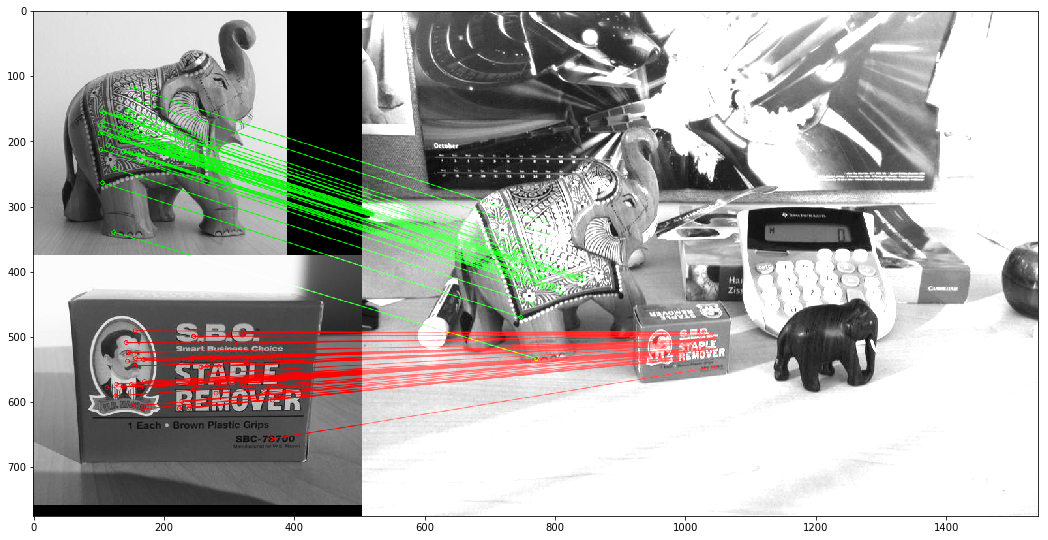

In [7]:
# your code here..
def ratioTest(matches):
    good = []
    for m,n in matches:
        if m.distance < 0.5*n.distance:
            good.append([m])
    return good
#prepare query images
height2 = q1.shape[0]+q2.shape[0]
width2 = q2.shape[1]
q2_withblack = np.zeros(shape=(height2,width2),dtype=np.uint8)
q2_withblack[q1.shape[0]:height2] = q2

q1_withblack = np.zeros(shape=(q1.shape[0],q2.shape[1]),dtype=np.uint8)
q1_withblack[0:q1.shape[0],0:q1.shape[1]] = q1

#sift object (cornder detection & description)
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(q1_withblack,None)
kp2, des2 = sift.detectAndCompute(q2_withblack,None)
kpSource, desSource = sift.detectAndCompute(img,None)

bf = cv2.BFMatcher()

good1 = ratioTest(bf.knnMatch(des1,desSource, k=2)) #match and pass through test
good2 = ratioTest(bf.knnMatch(des2,desSource, k=2)) #match and pass through test


imgResult = cv2.drawMatchesKnn(q1_withblack,kp1,img,kpSource,good1,outImg=None,
                          flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS,matchColor= (0,255,0)) #image result of query1 on source
imgResult2 = cv2.drawMatchesKnn(q2_withblack,kp2,img,kpSource,good2,outImg=None,
                          flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS ,matchColor= (255,0,0)) #image result of query2 on source

cv2.addWeighted(imgResult, 1, imgResult2, 1 , 0,imgResult2) #merge images to a single image in order

plt.figure(figsize=(18,12))
plt.imshow(imgResult2)
plt.show()

## Good Luck!